In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydsstools.heclib.dss import HecDss

In [64]:
dss_file = r".\\Data\Kanawha_G1.dss"

In [65]:
scenarios = [
    '2016 Cal_2DTesting_Initial_NoSA2D',    # Base
    'Jun-2016 Calibration_2DTesting_Single100',
    'Jun-2016 Calibration_2DTesting_Single200',
    'Jun-2016 Calibration_2DTesting_Single500',
    'Jun-2016 Calibration_2DTesting_Single1000',
    'Jun-2016 Calibration_2DTesting_Single2000',
    'Jun-2016 Calibration_Combo_Break_100',
    'Jun-2016 Calibration_Combo_Break_200',
    'Jun-2016 Calibration_Combo_Break_500_100',
    'Jun-2016 Calibration_Combo_Break_500_200',
    'Jun-2016 Calibration_Combo_Break_1000_300',
    'Jun-2016 Calibration_Combo_Break_2000_300',
    'Jun-2016 Calibration_Combo_Break_2000_500',
    'Jun-2016 Calibration_Hexagonal_200_50',
    'Jun-2016 Calibration_Hexagonal_2000_300',
    'Jun-2016 Calibration_Embankment_200_50',
    'Jun-2016 Calibration_Embankment_2000_300',
    'Jun-2016 Calibration_Refine_200_50',
    'Jun-2016 Calibration_Refine_500_200',
    'Jun-2016 Calibration_Refine_2000_300',
    'Jun-2016 Calibration_1sqmi_200_50',
    'Jun-2016 Calibration_1sqmi_2000_300',
]

In [66]:
start_date = '23Jun2016'
end_date = '26Jun2016'

In [67]:
# Note that output interval is 1 minute
base_plan = '2016 Cal_2DTesting_Initial_NoSA2D'
base_pathname = '/REFERENCE LINES/G1: GB at Durbin/FLOW/21Jun2016/1Minute/'

In [68]:
# Observed data
gage_pathname = '/GREENBRIER/GREENBRIER RIVER AT DURBIN/FLOW-TOTAL/01Nov2003/30Minute/USGS/'
df = pd.DataFrame()

with HecDss.Open(dss_file) as fid:
    ts = fid.read_ts(gage_pathname, window=(start_date, end_date))
    d = {'Datetime': pd.Series(ts.pytimes), 'Flow': pd.Series(ts.values)}
    gage_df = pd.DataFrame(d)   

gage_df['Hours'] = gage_df.index/2    
gage_df.head()

,Datetime,Flow,Hours
0,2016-06-23 00:00:00,151.0,0.0
1,2016-06-23 00:30:00,151.0,0.5
2,2016-06-23 01:00:00,148.0,1.0
3,2016-06-23 01:30:00,148.0,1.5
4,2016-06-23 02:00:00,148.0,2.0


In [69]:
# Set missing values to 0? Not necessary. There's was one missing value that i interpolated and put into the DSS file
gage_df.loc[gage_df['Flow'] < 0, 'Flow'] = 0

In [70]:
gage_df.describe()

,Datetime,Flow,Hours
count,145,145.000000,145.000000
mean,2016-06-24 12:00:00,1305.537964,36.000000
min,2016-06-23 00:00:00,145.000000,0.000000
25%,2016-06-23 18:00:00,624.000000,18.000000
50%,2016-06-24 12:00:00,1060.000000,36.000000
75%,2016-06-25 06:00:00,2020.000000,54.000000
max,2016-06-26 00:00:00,2890.000000,72.000000
std,NaN,857.247986,21.000992


In [71]:
df = pd.DataFrame()

with HecDss.Open(dss_file) as fid:
    for sc in scenarios:
        path = base_pathname + sc + "/"
        ts = fid.read_ts(path, window=(start_date, end_date))
        if 'Datetime' not in df.columns:    # Add the Datetime column once
            df['Datetime'] = pd.Series(ts.pytimes)
        df[sc] = pd.Series(ts.values)
    
df.head()

,Datetime,2016 Cal_2DTesting_Initial_NoSA2D,Jun-2016 Calibration_2DTesting_Single100,Jun-2016 Calibration_2DTesting_Single200,Jun-2016 Calibration_2DTesting_Single500,Jun-2016 Calibration_2DTesting_Single1000,Jun-2016 Calibration_2DTesting_Single2000,Jun-2016 Calibration_Combo_Break_100,Jun-2016 Calibration_Combo_Break_200,Jun-2016 Calibration_Combo_Break_500_100,...,Jun-2016 Calibration_Combo_Break_2000_500,Jun-2016 Calibration_Hexagonal_200_50,Jun-2016 Calibration_Hexagonal_2000_300,Jun-2016 Calibration_Embankment_200_50,Jun-2016 Calibration_Embankment_2000_300,Jun-2016 Calibration_Refine_200_50,Jun-2016 Calibration_Refine_500_200,Jun-2016 Calibration_Refine_2000_300,Jun-2016 Calibration_1sqmi_200_50,Jun-2016 Calibration_1sqmi_2000_300
0,2016-06-23 00:00:00,0.487188,0.047200,0.163305,0.118761,0.083265,0.119239,0.361312,0.278033,0.043635,...,0.128368,0.287309,0.178927,0.043427,0.137456,0.437379,0.434916,0.427890,0.436489,0.108914
1,2016-06-23 00:01:00,0.486846,0.047155,0.163149,0.118675,0.083218,0.119140,0.361044,0.278939,0.043578,...,0.128272,0.288466,0.178761,0.043376,0.137453,0.437028,0.434549,0.428568,0.436830,0.108826
2,2016-06-23 00:02:00,0.486504,0.047110,0.162994,0.118589,0.083172,0.119042,0.360774,0.279834,0.043522,...,0.128176,0.289616,0.178593,0.043325,0.137449,0.436676,0.434183,0.429245,0.437149,0.108739
3,2016-06-23 00:03:00,0.486160,0.047065,0.162838,0.118504,0.083126,0.118943,0.360503,0.280718,0.043465,...,0.128080,0.290760,0.178425,0.043274,0.137446,0.436323,0.433817,0.429920,0.437447,0.108652
4,2016-06-23 00:04:00,0.485815,0.047020,0.162683,0.118419,0.083080,0.118845,0.360231,0.281589,0.043409,...,0.127984,0.291895,0.178255,0.043223,0.137442,0.435970,0.433451,0.430594,0.437723,0.108565


In [72]:
df.describe()

,Datetime,2016 Cal_2DTesting_Initial_NoSA2D,Jun-2016 Calibration_2DTesting_Single100,Jun-2016 Calibration_2DTesting_Single200,Jun-2016 Calibration_2DTesting_Single500,Jun-2016 Calibration_2DTesting_Single1000,Jun-2016 Calibration_2DTesting_Single2000,Jun-2016 Calibration_Combo_Break_100,Jun-2016 Calibration_Combo_Break_200,Jun-2016 Calibration_Combo_Break_500_100,...,Jun-2016 Calibration_Combo_Break_2000_500,Jun-2016 Calibration_Hexagonal_200_50,Jun-2016 Calibration_Hexagonal_2000_300,Jun-2016 Calibration_Embankment_200_50,Jun-2016 Calibration_Embankment_2000_300,Jun-2016 Calibration_Refine_200_50,Jun-2016 Calibration_Refine_500_200,Jun-2016 Calibration_Refine_2000_300,Jun-2016 Calibration_1sqmi_200_50,Jun-2016 Calibration_1sqmi_2000_300
count,4321,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,...,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000
mean,2016-06-24 12:00:00.000000256,1005.359863,999.637146,952.325012,390.308228,517.195679,434.214935,1078.102783,983.255371,781.017212,...,615.751770,1008.990295,648.940186,974.719849,571.061829,1003.575012,695.699768,663.711670,993.291016,646.062134
min,2016-06-23 00:00:00,0.404401,0.031266,0.112135,0.108872,0.066693,0.029023,0.293384,0.278033,0.027981,...,0.111305,0.284263,0.119742,0.034876,0.120549,0.358254,0.286829,0.427890,0.362028,0.082566
25%,2016-06-23 18:00:00,233.513947,232.266159,286.724304,239.107483,176.676300,180.246582,218.065598,264.599030,317.412689,...,245.338181,255.114441,305.446655,262.505188,273.210480,232.694031,318.088074,312.753479,251.426331,297.820190
50%,2016-06-24 12:00:00,414.530579,448.791595,511.855957,395.657745,481.403076,407.376129,411.978638,497.621674,517.401428,...,504.925934,472.611053,521.757446,483.712830,560.864624,416.679535,550.064758,538.497375,454.776031,498.772339
75%,2016-06-25 06:00:00,1325.466919,1358.574341,1377.557617,560.572693,825.963623,644.152405,1419.377930,1329.898071,1169.366699,...,930.267212,1345.711548,1062.192017,1349.107910,858.931885,1311.820679,1091.789795,1084.190674,1357.912109,1059.201172
max,2016-06-26 00:00:00,4341.463867,4378.052246,3498.225098,818.089600,1201.717285,1061.827515,5021.905762,3946.633545,2368.361328,...,1658.735352,4249.534668,1630.423706,3903.242676,1280.895264,4341.639648,1920.760498,1635.130127,4109.602051,1646.076294
std,NaN,1221.229614,1188.842163,1022.277344,248.144211,378.698212,315.050385,1344.947632,1102.503174,722.679016,...,500.824158,1167.705566,519.494934,1103.054932,400.157227,1220.605835,563.716309,514.555542,1144.149414,529.521912


In [73]:
# Check that the data ends where it should
df.tail()

,Datetime,2016 Cal_2DTesting_Initial_NoSA2D,Jun-2016 Calibration_2DTesting_Single100,Jun-2016 Calibration_2DTesting_Single200,Jun-2016 Calibration_2DTesting_Single500,Jun-2016 Calibration_2DTesting_Single1000,Jun-2016 Calibration_2DTesting_Single2000,Jun-2016 Calibration_Combo_Break_100,Jun-2016 Calibration_Combo_Break_200,Jun-2016 Calibration_Combo_Break_500_100,...,Jun-2016 Calibration_Combo_Break_2000_500,Jun-2016 Calibration_Hexagonal_200_50,Jun-2016 Calibration_Hexagonal_2000_300,Jun-2016 Calibration_Embankment_200_50,Jun-2016 Calibration_Embankment_2000_300,Jun-2016 Calibration_Refine_200_50,Jun-2016 Calibration_Refine_500_200,Jun-2016 Calibration_Refine_2000_300,Jun-2016 Calibration_1sqmi_200_50,Jun-2016 Calibration_1sqmi_2000_300
4316,2016-06-25 23:56:00,187.321060,195.869690,248.625656,321.081116,343.477966,304.956573,177.618973,223.052841,280.879425,...,311.152100,213.577454,292.186340,226.632736,340.407806,189.330261,289.328033,284.846893,208.706604,283.097992
4317,2016-06-25 23:57:00,187.208389,195.726364,248.489105,322.689423,343.351501,304.823517,177.501038,222.919037,280.724457,...,311.009003,213.436432,292.048340,226.504623,340.237793,189.230560,289.178680,284.702362,208.592850,282.972015
4318,2016-06-25 23:58:00,187.095673,195.583405,248.349014,324.122131,343.224976,304.690552,177.381973,222.785553,280.569763,...,310.865997,213.295654,291.909943,226.376465,340.068146,189.130661,289.028137,284.557861,208.479279,282.845947
4319,2016-06-25 23:59:00,186.982544,195.440872,248.205750,325.304352,343.098328,304.557739,177.262070,222.652313,280.415405,...,310.723053,213.155136,291.771393,226.248291,339.897980,189.030426,288.876373,284.413422,208.366119,282.719727
4320,2016-06-26 00:00:00,186.871262,195.298798,248.059662,326.232239,342.971588,304.425079,177.141602,222.519302,280.261353,...,310.580170,213.014832,291.633972,226.120163,339.727173,188.929810,288.723358,284.269104,208.253479,282.593323


In [74]:
# Create a minutes column to be used for plotting
df['Hours'] = df.index/60

In [75]:
figure_title = 'Greenbrier at Durbin, WV'

In [76]:
# https://sashamaps.net/docs/resources/20-colors/
# The Base scenario is black and all other scenarios are grey
colors = ['#e6194B', '#3cb44b', '#42d4f4', '#f032e6', '#f58231', '#ffe119', '#bfef45', '#4363d8', '#911eb4']

# Single Size Cells

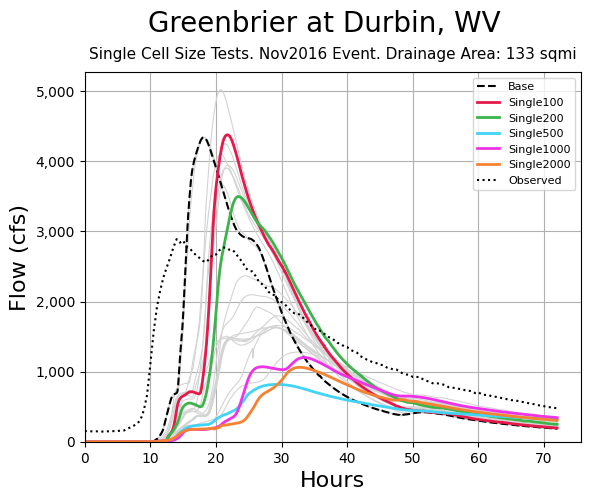

In [77]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Single Cell Size Tests. Nov2016 Event. Drainage Area: 133 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)

# All other scenarios plotted as grey lines
for sc in scenarios:
    if 'Single' not in sc:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=0.8, color='lightgrey', label='')

# The Base hydrograph
plt.plot('Hours', base_plan, data=df, linestyle='--', color='black', label='Base')
        
# To plot the scenarios of interest on top of other lines
for sc in scenarios:
    if 'Single' in sc:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("Jun-2016 Calibration_2DTesting_", ""))
        count += 1 

# Observed gage data
plt.plot('Hours', "Flow", data=gage_df, linestyle=':', color='black', label='Observed')

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/Greenbrier_Durbin_Single.png', bbox_inches='tight')
plt.show()

# Breaklines

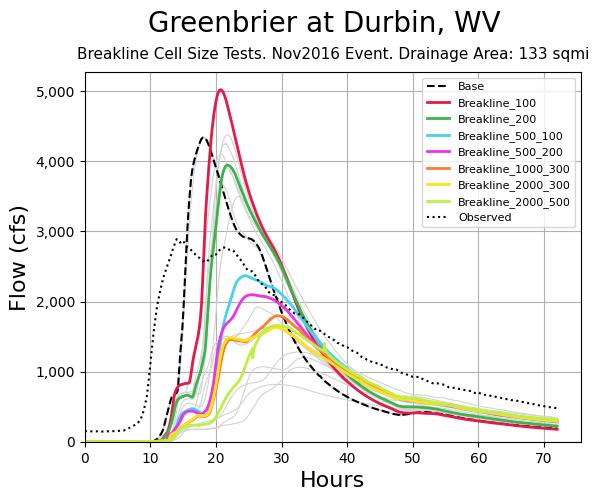

In [78]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Breakline Cell Size Tests. Nov2016 Event. Drainage Area: 133 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)

# All other scenarios plotted as grey lines
for sc in scenarios:
    if 'Combo_Break' not in sc:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=0.8, color='lightgrey', label='')

# The Base hydrograph
plt.plot('Hours', base_plan, data=df, linestyle='--', color='black', label='Base')
        
# To plot the scenarios of interest on top of other lines
for sc in scenarios:
    if 'Combo_Break' in sc:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("Jun-2016 Calibration_Combo_Break_", "Breakline_"))
        count += 1 

# Observed gage data
plt.plot('Hours', "Flow", data=gage_df, linestyle=':', color='black', label='Observed')

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/Greenbrier_Durbin_Breakline.png', bbox_inches='tight')
plt.show()

# Refinement Regions

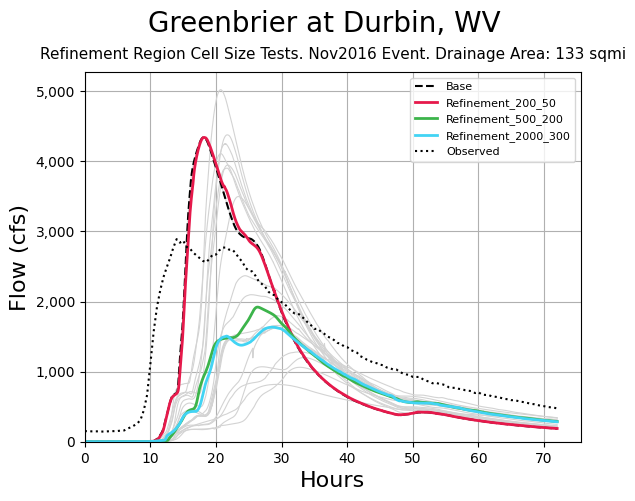

In [79]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Refinement Region Cell Size Tests. Nov2016 Event. Drainage Area: 133 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)

# All other scenarios plotted as grey lines
for sc in scenarios:
    if 'Refine' not in sc:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=0.8, color='lightgrey', label='')

# The Base hydrograph
plt.plot('Hours', base_plan, data=df, linestyle='--', color='black', label='Base')
        
# To plot the scenarios of interest on top of other lines
for sc in scenarios:
    if 'Refine' in sc:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("Jun-2016 Calibration_Refine_", "Refinement_"))
        count += 1 

# Observed gage data
plt.plot('Hours', "Flow", data=gage_df, linestyle=':', color='black', label='Observed')

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/Greenbrier_Durbin_Refinement.png', bbox_inches='tight')
plt.show()

# Other Cell Size Tests

In [80]:
other_200_scenarios = [
    'Jun-2016 Calibration_Hexagonal_200_50',
    'Jun-2016 Calibration_Embankment_200_50',
    'Jun-2016 Calibration_1sqmi_200_50',
]

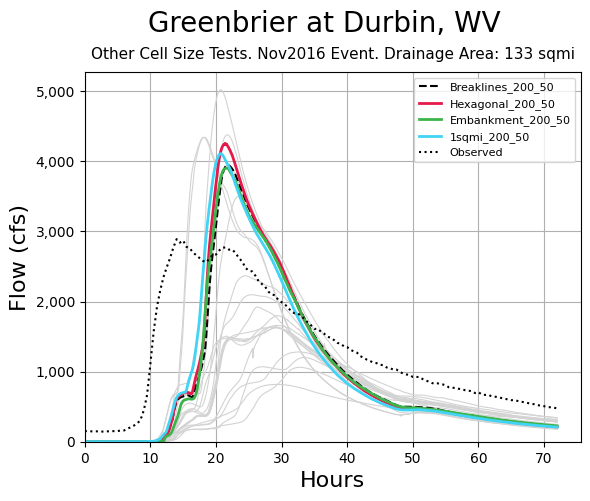

In [81]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Other Cell Size Tests. Nov2016 Event. Drainage Area: 133 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)

# All other scenarios plotted as grey lines
for sc in scenarios:
    if sc not in other_200_scenarios:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=0.8, color='lightgrey', label='')

# The Base hydrograph
plt.plot('Hours', "Jun-2016 Calibration_Combo_Break_200", data=df, linestyle='--', color='black', label='Breaklines_200_50')
        
# To plot the scenarios of interest on top of other lines
for sc in scenarios:
    if sc in other_200_scenarios:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("Jun-2016 Calibration_", ""))
        count += 1 

# Observed gage data
plt.plot('Hours', "Flow", data=gage_df, linestyle=':', color='black', label='Observed')

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/Greenbrier_Durbin_OtherCellSize_200.png', bbox_inches='tight')
plt.show()

In [82]:
other_2000_scenarios = [
    'Jun-2016 Calibration_1sqmi_2000_300',
    'Jun-2016 Calibration_Embankment_2000_300',
    'Jun-2016 Calibration_Hexagonal_2000_300',
]

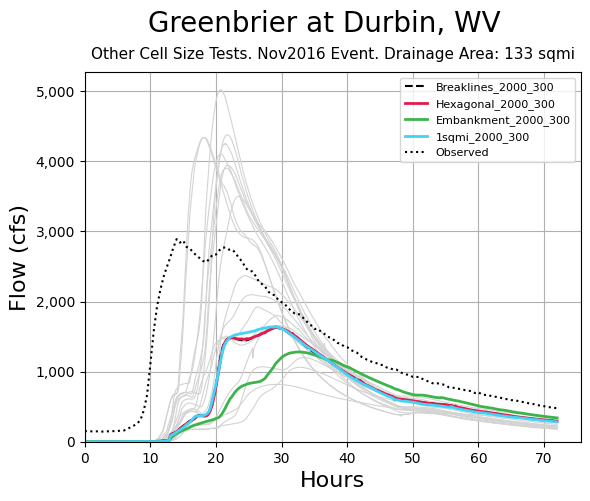

In [83]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Other Cell Size Tests. Nov2016 Event. Drainage Area: 133 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)

# All other scenarios plotted as grey lines
for sc in scenarios:
    if sc not in other_2000_scenarios:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=0.8, color='lightgrey', label='')

# The Base hydrograph
plt.plot('Hours', "Jun-2016 Calibration_Combo_Break_2000_300", data=df, linestyle='--', color='black', label='Breaklines_2000_300')
        
# To plot the scenarios of interest on top of other lines
for sc in scenarios:
    if sc in other_2000_scenarios:
        plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("Jun-2016 Calibration_", ""))
        count += 1 

# Observed gage data
plt.plot('Hours', "Flow", data=gage_df, linestyle=':', color='black', label='Observed')

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/Greenbrier_Durbin_OtherCellSize_2000.png', bbox_inches='tight')
plt.show()

# Additional Parameter Tests

In [84]:
additional_scenarios = [
    'Jun-2016 Calibration_Break_2000300_MC1DW',
    'Jun-2016 Calibration_Break_2000300_MC3DW',
    'Jun-2016 Calibration_Break_2000300_MC5DW',
    'Jun-2016 Calibration_Break_2000300_SWEEM',
    'Jun-2016 Calibration_Break_2000_300_CNDec',
    'Jun-2016 Calibration_Break_2000_300_CNInc',
    'Jun-2016 Calibration_Break_2000_300_FixDW',
    'Jun-2016 Calibration_Break_2000_300_FixSWE',
    'Jun-2016 Calibration_Break_2000_300_MC1SWE',
    'Jun-2016 Calibration_Break_2000_300_MC3SWE',
    'Jun-2016 Calibration_Break_2000_300_ManDec',
    'Jun-2016 Calibration_Break_2000_300_ManInc',
    'Jun-2016 Calibration_Break_200_50_CNDec',
    'Jun-2016 Calibration_Break_200_50_CNInc',
    'Jun-2016 Calibration_Break_200_50_FixDW',
    'Jun-2016 Calibration_Break_200_50_FixSWE',
    'Jun-2016 Calibration_Break_200_50_MC1DW',
    'Jun-2016 Calibration_Break_200_50_MC1SWE',
    'Jun-2016 Calibration_Break_200_50_MC3DW',
    'Jun-2016 Calibration_Break_200_50_MC3SWE',
    'Jun-2016 Calibration_Break_200_50_MC5DW',
    'Jun-2016 Calibration_Break_200_50_ManDec',
    'Jun-2016 Calibration_Break_200_50_ManInc',
    'Jun-2016 Calibration_Break_200_50_SWE-EM',
]

In [85]:
# adding additional parameter datasets to df

with HecDss.Open(dss_file) as fid:
    for sc in additional_scenarios:
        path = base_pathname + sc + "/"
        ts = fid.read_ts(path, window=(start_date, end_date))
        df[sc] = pd.Series(ts.values)

# Curve Number

In [86]:
cn_scenarios = [
    'Jun-2016 Calibration_Break_200_50_CNDec',
    'Jun-2016 Calibration_Break_200_50_CNInc',
    'Jun-2016 Calibration_Break_2000_300_CNDec',
    'Jun-2016 Calibration_Break_2000_300_CNInc',
]

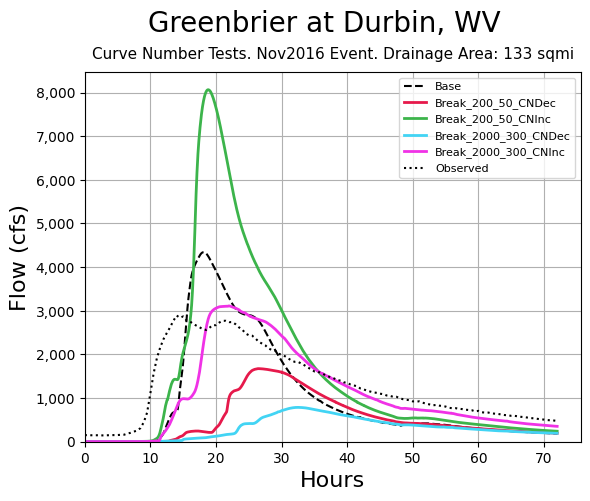

In [87]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Curve Number Tests. Nov2016 Event. Drainage Area: 133 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)

# The Base hydrograph
plt.plot('Hours', base_plan, data=df, linestyle='--', color='black', label='Base')
        
# To plot the scenarios of interest on top of other lines
for sc in cn_scenarios:
    plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("Jun-2016 Calibration_", ""))
    count += 1 

# Observed gage data
plt.plot('Hours', "Flow", data=gage_df, linestyle=':', color='black', label='Observed')

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/Greenbrier_Durbin_CN.png', bbox_inches='tight')
plt.show()

# Mannings

In [88]:
mannings_scenarios = [
    'Jun-2016 Calibration_Break_200_50_ManDec',
    'Jun-2016 Calibration_Break_200_50_ManInc',
    'Jun-2016 Calibration_Break_2000_300_ManDec',
    'Jun-2016 Calibration_Break_2000_300_ManInc',
]

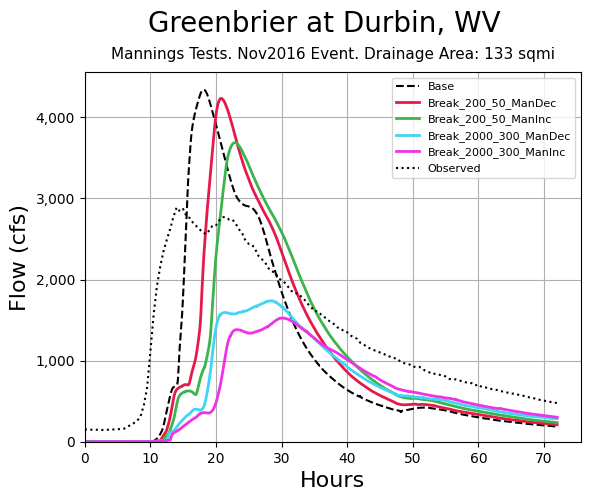

In [89]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Mannings Tests. Nov2016 Event. Drainage Area: 133 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)

# The Base hydrograph
plt.plot('Hours', base_plan, data=df, linestyle='--', color='black', label='Base')
        
# To plot the scenarios of interest on top of other lines
for sc in mannings_scenarios:
    plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("Jun-2016 Calibration_", ""))
    count += 1 

# Observed gage data
plt.plot('Hours', "Flow", data=gage_df, linestyle=':', color='black', label='Observed')

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/Greenbrier_Durbin_Mannings.png', bbox_inches='tight')
plt.show()

# Time Step and Courant

In [90]:
time_200_scenarios = [
    'Jun-2016 Calibration_Break_200_50_SWE-EM',
    'Jun-2016 Calibration_Break_200_50_FixDW',
    'Jun-2016 Calibration_Break_200_50_FixSWE',
    'Jun-2016 Calibration_Break_200_50_MC1DW',
    'Jun-2016 Calibration_Break_200_50_MC1SWE',
    'Jun-2016 Calibration_Break_200_50_MC3DW',
    'Jun-2016 Calibration_Break_200_50_MC3SWE',
    'Jun-2016 Calibration_Break_200_50_MC5DW',
]

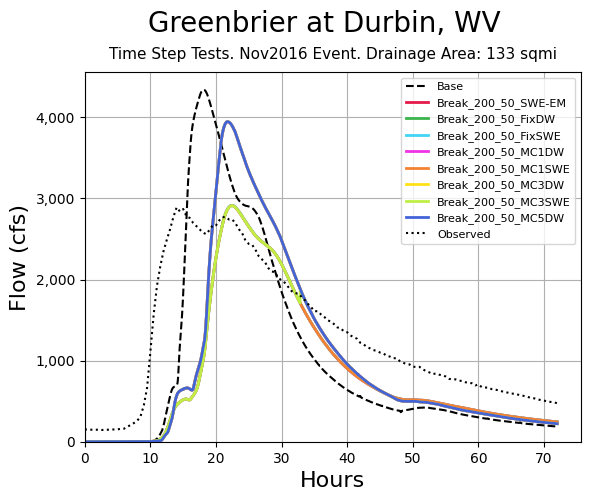

In [91]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Time Step Tests. Nov2016 Event. Drainage Area: 133 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)

# The Base hydrograph
plt.plot('Hours', base_plan, data=df, linestyle='--', color='black', label='Base')
        
# To plot the scenarios of interest on top of other lines
for sc in time_200_scenarios:
    plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("Jun-2016 Calibration_", ""))
    count += 1 

# Observed gage data
plt.plot('Hours', "Flow", data=gage_df, linestyle=':', color='black', label='Observed')

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/Greenbrier_Durbin_TimeStep200.png', bbox_inches='tight')
plt.show()

In [92]:
time_2000_scenarios = [
    'Jun-2016 Calibration_Break_2000300_SWEEM',
    'Jun-2016 Calibration_Break_2000_300_FixDW',
    'Jun-2016 Calibration_Break_2000_300_FixSWE',
    'Jun-2016 Calibration_Break_2000300_MC1DW',
    'Jun-2016 Calibration_Break_2000_300_MC1SWE',
    'Jun-2016 Calibration_Break_2000300_MC3DW',
    'Jun-2016 Calibration_Break_2000_300_MC3SWE',
    'Jun-2016 Calibration_Break_2000300_MC5DW',
]

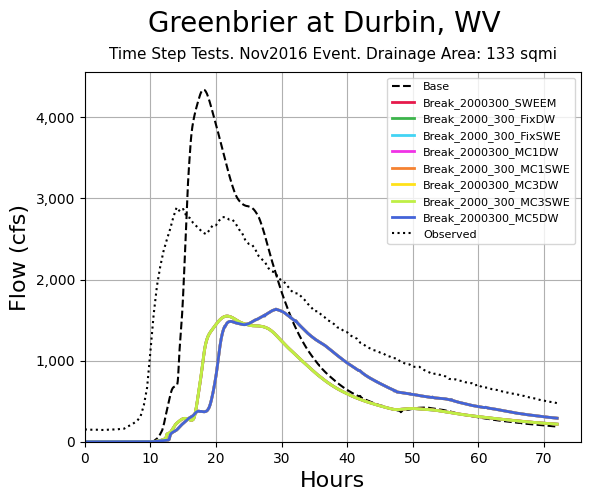

In [93]:
count = 0   # Used to cycle to colors list to highlight scenarios

fig = plt.figure()
fig.suptitle(figure_title, y=1.01, fontsize=20)
plt.title("Time Step Tests. Nov2016 Event. Drainage Area: 133 sqmi", fontsize=11, pad=10)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Flow (cfs)', fontsize=16)

# The Base hydrograph
plt.plot('Hours', base_plan, data=df, linestyle='--', color='black', label='Base')
        
# To plot the scenarios of interest on top of other lines
for sc in time_2000_scenarios:
    plt.plot('Hours', sc, data=df, linestyle='-', linewidth=2, color=colors[count], label=sc.replace("Jun-2016 Calibration_", ""))
    count += 1 

# Observed gage data
plt.plot('Hours', "Flow", data=gage_df, linestyle=':', color='black', label='Observed')

# Add thousand separator comma
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# Set axes to start in bottom left corner
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.grid()
plt.legend(prop={'size': 8})
plt.savefig('Figures/Greenbrier_Durbin_TimeStep2000.png', bbox_inches='tight')
plt.show()